In [72]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# constants
hbar = 1
omega = 1
mass = 1
lamb = 1

# creation and annihilation operators
N = 20
adag = qt.create(N)
a = qt.destroy(N)

# x and p ops in creation and annihilation basis
x_op = (a + adag) * np.sqrt(hbar / 2 / mass / omega)
p_op = 1j * (adag - a) * np.sqrt(mass * omega * hbar / 2)

# create hamiltonian
kineticTerm = p_op**2 / 2 / mass
potentialTerm = 0.5 * mass * omega**2 * x_op**2
perturbationTerm = lamb / 24 * x_op**4
H0 = kineticTerm + potentialTerm + perturbationTerm

# diagonalize
eigenvalues, eigenstates = H0.eigenstates()

# driving operator
def drive(t, V0, wd):
    return V0 * np.cos(wd * t)

# initial state
tlist = np.linspace(0, 500, 1000)
psi0 = qt.basis(N, 0)
wd = eigenvalues[1] - eigenvalues[0] # implicitly (eigenvalues[1] - eigenvalues[0]) / hbar but hbar = 1

$\textbf{Question 4 Part B:}$

$\textbf{What constitutes “weak” and “strong” driving by identifying the relevant energy scale to compare V0 against.}$

A weak driving strength would be a V0 that is significantly less than the anharmonicity which is (E2-E1) - (E1-E0). A strong drive strength would be one that is much larger than the anharmonity.

$\textbf{Discuss how the dynamics differ between these regimes.}$

When wd = transition freq for 0 -> 1, it looks like the weaker drive strength (V0=0.01) allows the 1 state to very nearly fully populate when starting at the 0 state. As I increase the V0 slowly even to 0.05 the 1 state no longer fully populates but it still has quite a high probability at around 90-95%. However, the time it takes to populate the 1 state gets longer as the V0 decreases further which can slow down the action of quantum gates.

The wd is the same as the weaker V0. The stronger V0 at 1.0 allows us to populate the 1 state much quicker starting from the 0 state but at every revival to the 1 state probability slowly decreases more and more. Also other states besides 0 and 1 have a non-negligible probability which can be bad for quantum computation because we will be leaving the computational basis. The probabilites are also much wavier and sporatic compared to the weaker V0 which has a smoother curve.

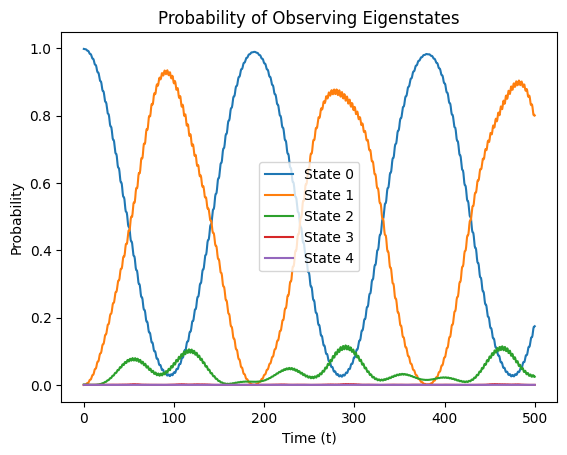

In [80]:
# weak drive strength
V0 = 0.05
args = {"V0": V0, "wd": wd}

# time evolve
H = [H0, [x_op, drive]]
psi_t = qt.sesolve(H, psi0, tlist, args=args)

P0 = []
P1 = []
P2 = []
P3 = []
P4 = []

for state in psi_t.states:
    P0.append(np.abs(eigenstates[0].dag() * state)**2)
    P1.append(np.abs(eigenstates[1].dag() * state)**2)
    P2.append(np.abs(eigenstates[2].dag() * state)**2)
    P3.append(np.abs(eigenstates[3].dag() * state)**2)
    P4.append(np.abs(eigenstates[4].dag() * state)**2)

plist = []
plist.append(P0)
plist.append(P1)
plist.append(P2)
plist.append(P3)
plist.append(P4)

plt.title(f"Probability of Observing Eigenstates")
for i in range(5):
    plt.ylabel("Probability")
    plt.xlabel("Time (t)")
    plt.plot(tlist, plist[i], label=f"State {i}")
plt.legend()
plt.show()

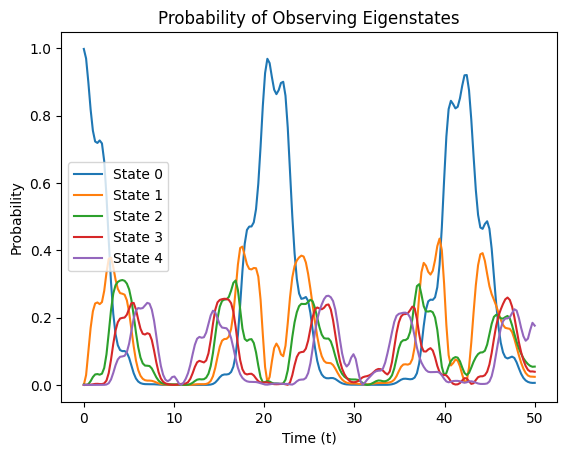

In [ ]:
# stronger drive strength
V0 = 1.0
args = {"V0": V0, "wd": wd}
tlist_smaller = np.linspace(0, 50, 200)

# time evolve
H = [H0, [x_op, drive]]
psi_t = qt.sesolve(H, psi0, tlist_smaller, args=args)

P0 = []
P1 = []
P2 = []
P3 = []
P4 = []

for state in psi_t.states:
    P0.append(np.abs(eigenstates[0].dag() * state)**2)
    P1.append(np.abs(eigenstates[1].dag() * state)**2)
    P2.append(np.abs(eigenstates[2].dag() * state)**2)
    P3.append(np.abs(eigenstates[3].dag() * state)**2)
    P4.append(np.abs(eigenstates[4].dag() * state)**2)

plist = []
plist.append(P0)
plist.append(P1)
plist.append(P2)
plist.append(P3)
plist.append(P4)

plt.title(f"Probability of Observing Eigenstates")
for i in range(5):
    plt.ylabel("Probability")
    plt.xlabel("Time (t)")
    plt.plot(tlist_smaller, plist[i], label=f"State {i}")
plt.legend()
plt.show()